In [1]:
!nvidia-smi

Mon Feb 24 15:43:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [42]:
image_path = "/content/drive/MyDrive/Colab Notebooks/sd_lora_project/image-outputs/gen-img-2.2-51-1e5-9.png"
lora_weights_path = "/content/drive/MyDrive/Colab Notebooks/sd_lora_project/lora-outputs/pytorch_lora_weights.safetensors"

In [4]:
!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [6]:
from diffusers import StableDiffusionXLImg2ImgPipeline
import torch
from safetensors.torch import load_file

pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
).to("cuda")


lora_load = load_file(lora_weights_path, device="cuda")

# Apply LoRA weights to the model
pipe.unet.load_state_dict(lora_load, False)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

_IncompatibleKeys(missing_keys=['conv_in.weight', 'conv_in.bias', 'time_embedding.linear_1.weight', 'time_embedding.linear_1.bias', 'time_embedding.linear_2.weight', 'time_embedding.linear_2.bias', 'add_embedding.linear_1.weight', 'add_embedding.linear_1.bias', 'add_embedding.linear_2.weight', 'add_embedding.linear_2.bias', 'down_blocks.0.resnets.0.norm1.weight', 'down_blocks.0.resnets.0.norm1.bias', 'down_blocks.0.resnets.0.conv1.weight', 'down_blocks.0.resnets.0.conv1.bias', 'down_blocks.0.resnets.0.time_emb_proj.weight', 'down_blocks.0.resnets.0.time_emb_proj.bias', 'down_blocks.0.resnets.0.norm2.weight', 'down_blocks.0.resnets.0.norm2.bias', 'down_blocks.0.resnets.0.conv2.weight', 'down_blocks.0.resnets.0.conv2.bias', 'down_blocks.0.resnets.1.norm1.weight', 'down_blocks.0.resnets.1.norm1.bias', 'down_blocks.0.resnets.1.conv1.weight', 'down_blocks.0.resnets.1.conv1.bias', 'down_blocks.0.resnets.1.time_emb_proj.weight', 'down_blocks.0.resnets.1.time_emb_proj.bias', 'down_blocks.0.res

In [70]:
from PIL import Image
import requests

# Load an image (this acts as the "init_image" for img2img)
init_image = Image.open(image_path).convert("RGB").resize((1024, 1024))

prompt = "yellow wall"
negative_prompt = ""



In [72]:
output = pipe(
    prompt=prompt,
    image=init_image,
    strength=.8,  #.7
    guidance_scale=10 # 8
).images[0]

display(output)

Output hidden; open in https://colab.research.google.com to view.

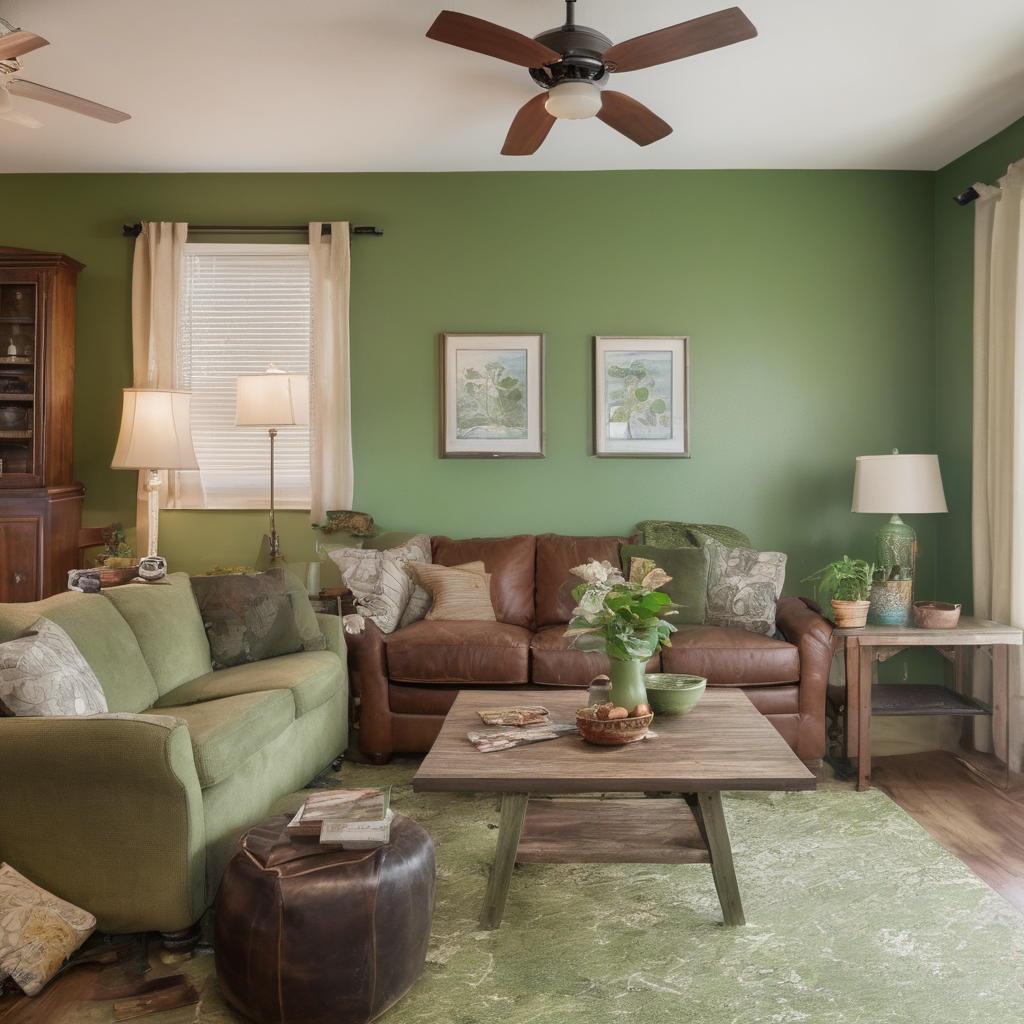

In [43]:
from IPython.display import Image
display(Image(image_path))

Image saved as output.png
